Note: You will get an error saying that the code is closing in the memory limit of 12Gb. You can click 'terminate other runtimes'.
       This error is popping up because the dataset is taking up most of the space, so don't worry
       
         
   [colablink](https://colab.research.google.com/drive/1nuIie_xMzOVI2P_m4r8niOqwcZNXJYRM)
      

### Install fastai

In [1]:
!pip install fastai

  Using cached https://files.pythonhosted.org/packages/50/6d/9d0d6e17a78b0598d5e8c49a0d03ffc7ff265ae62eca3e2345fab14edb9b/fastai-0.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/47/87/313cd4ea4f75472826acb74c57f94fc83e04ba93e4ccf35656f6b7f502e2/graphviz-0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/68/8bbf0ef969095a13ba0d4c77c1945bd86e9811960d052510551d29a2f23b/jedi-0.12.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7e/9c/c94f46b40b86d2c77c46c4c1b858fc66c117b4390665eca28f2e0812db45/sklearn_pandas-1.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fe/49/7af942bc63277dfca6ad397415f4cff60789c56d173b1f7edf0bd30e27e0/plotnine-0.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/83/df/0f5dd132200728a86190397e1ea87cd76244e42d39ec5e88efd25b2abd7e/jupyter-1.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/30/

**Data** available from http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [2]:
!mkdir data && wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip && unzip ml-latest-small.zip -d data/


Redirecting output to ‘wget-log’.
Archive:  ml-latest-small.zip
   creating: data/ml-latest-small/
  inflating: data/ml-latest-small/links.csv  
  inflating: data/ml-latest-small/tags.csv  
  inflating: data/ml-latest-small/ratings.csv  
  inflating: data/ml-latest-small/README.txt  
  inflating: data/ml-latest-small/movies.csv  


## Movielens

In [0]:
#%reload_ext autoreload
#%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

In [0]:
path='data/ml-latest-small/'

We're working with the movielens data, which contains one rating per row, like this:

In [5]:
ratings = pd.read_csv(path+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Just for display purposes, let's read in the movie names too.

In [6]:
movies = pd.read_csv(path+'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Create subset for Excel

We create a crosstab of the most popular movies and most movie-addicted users which we'll copy into Excel for creating a simple example. This isn't necessary for any of the modeling below however.

In [7]:
g=ratings.groupby('userId')['rating'].count()
topUsers=g.sort_values(ascending=False)[:15]

g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:15]

top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


## Collaborative filtering

In [0]:
val_idxs = get_cv_idxs(len(ratings))
wd=2e-4
n_factors = 50

In [10]:
cf = CollabFilterDataset.from_csv(path, 'ratings.csv', 'userId', 'movieId', 'rating')
%time learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

CPU times: user 41.7 ms, sys: 1.68 ms, total: 43.3 ms
Wall time: 43.3 ms


In [11]:
cf

In [12]:
len(ratings), len(movies), len(val_idxs)

(100836, 9742, 20167)

In [14]:
len(ratings.groupby('userId'))

610

In [15]:
len(movies.groupby('movieId'))

9742

In [16]:
len(ratings.groupby('movieId'))


9724

In [17]:
learn

EmbeddingDotBias(
  (u): Embedding(610, 50)
  (i): Embedding(9724, 50)
  (ub): Embedding(610, 1)
  (ib): Embedding(9724, 1)
)

In [18]:
lrf = learn.lr_find()

 71%|███████   | 890/1261 [00:08<00:03, 103.47it/s, loss=4.43]


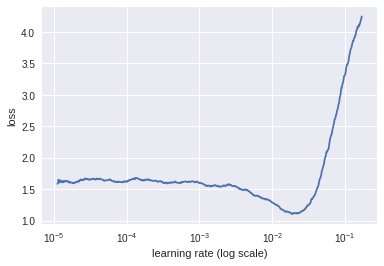

In [19]:
learn.sched.plot()


In [22]:
%time learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      0.671052   0.74697   
    1      0.706876   0.748585  
    2      0.523123   0.736923  

CPU times: user 28.6 s, sys: 7.42 s, total: 36 s
Wall time: 38.7 s


[array([0.73692])]

Let's compare to some benchmarks. Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on [RMSE](http://www.statisticshowto.com/rmse/) of 0.91. We'll need to take the square root of our loss, since we use plain MSE.

In [23]:
math.sqrt(0.736923)

0.8584421937439934

Looking good - we've found a solution better than any of those benchmarks! Let's take a look at how the predictions compare to actuals for this model.

In [0]:
preds = learn.predict()

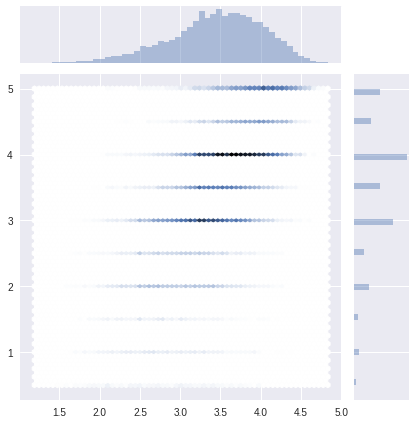

In [25]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);